In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/heart-diseaseuci/heart.csv')
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

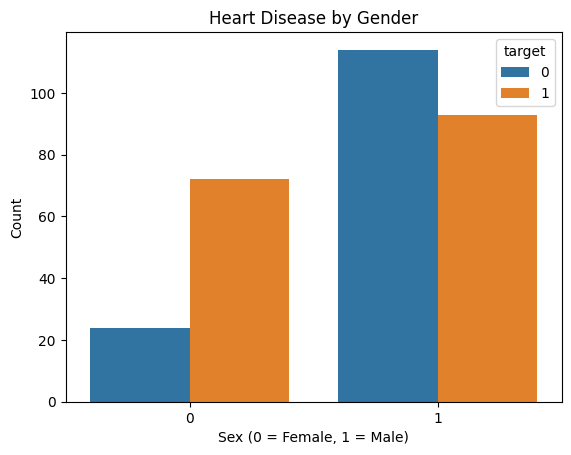

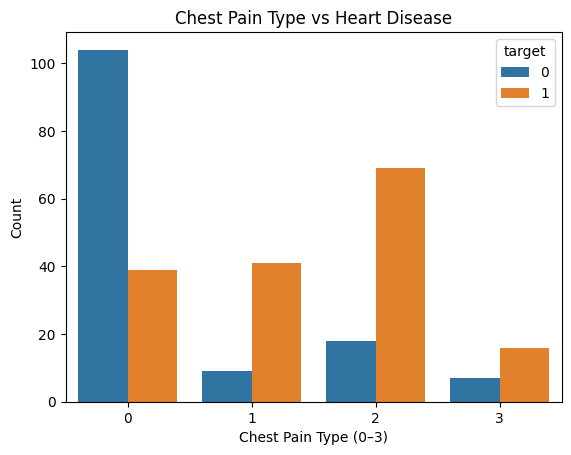

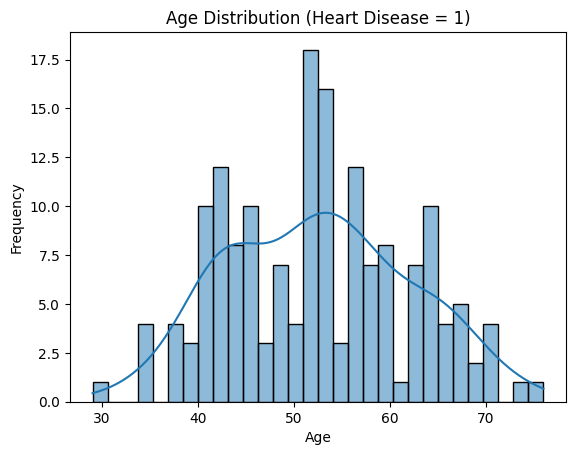

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Gender Distribution
sns.countplot(data=df, x='sex', hue='target')
plt.title("Heart Disease by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

# Plot 2: Chest Pain Type vs Target
sns.countplot(data=df, x='cp', hue='target')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0–3)")
plt.ylabel("Count")
plt.show()

# Plot 3: Age Distribution for Patients with Heart Disease
sns.histplot(df[df['target'] == 1]['age'], bins=30, kde=True)
plt.title("Age Distribution (Heart Disease = 1)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [6]:
# Fix zero values if needed (none detected but still safe)
df = df[df['trestbps'] != 0]
df = df[df['chol'] != 0]

In [7]:
# Correlation with target
corr = df.corr()['target'].abs().sort_values(ascending=False)

# Filter features with correlation > 0.3
selected_features = corr[corr > 0.3].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['target', 'exang', 'cp', 'oldpeak', 'thalach', 'ca', 'slope', 'thal']


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[selected_features].drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN parameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_knn = grid.best_estimator_
print("Best KNN:", grid.best_params_)


Best KNN: {'n_neighbors': 5}


Accuracy: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.86      0.86      0.86        28

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



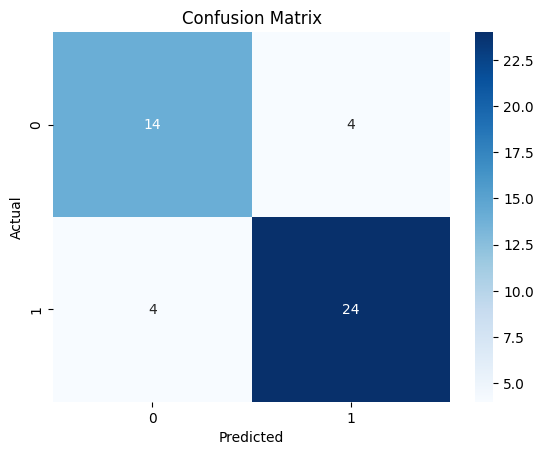

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Load Dataset (Fix: use correct folder path)
heart_disease_data = pd.read_csv('/kaggle/input/heart-diseaseuci/heart.csv')

# One-Hot Encoding for Categorical Features
X_encoded = pd.get_dummies(heart_disease_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Separate Features and Target
X = X_encoded.drop('target', axis=1)
y = heart_disease_data['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Train SVM Classifier
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_train, y_train)

# Predict on Test Data
y_pred_svc = svc.predict(X_test)

# Evaluation
svc_cm = confusion_matrix(y_test, y_pred_svc)
svc_acc = accuracy_score(y_test, y_pred_svc)

# Print Results
print("Confusion Matrix:\n", svc_cm)
print("Accuracy Score:", svc_acc)


Confusion Matrix:
 [[21  9]
 [ 3 28]]
Accuracy Score: 0.8032786885245902


In [14]:
import joblib
joblib.dump(best_knn, 'best_knn_model.pkl')

['best_knn_model.pkl']